# MELBOURNE  HOUSING PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns
%matplotlib inline
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)

In [2]:
mel_b = pd.read_csv('melb_data.csv')

In [3]:
mel_b

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


<AxesSubplot:>

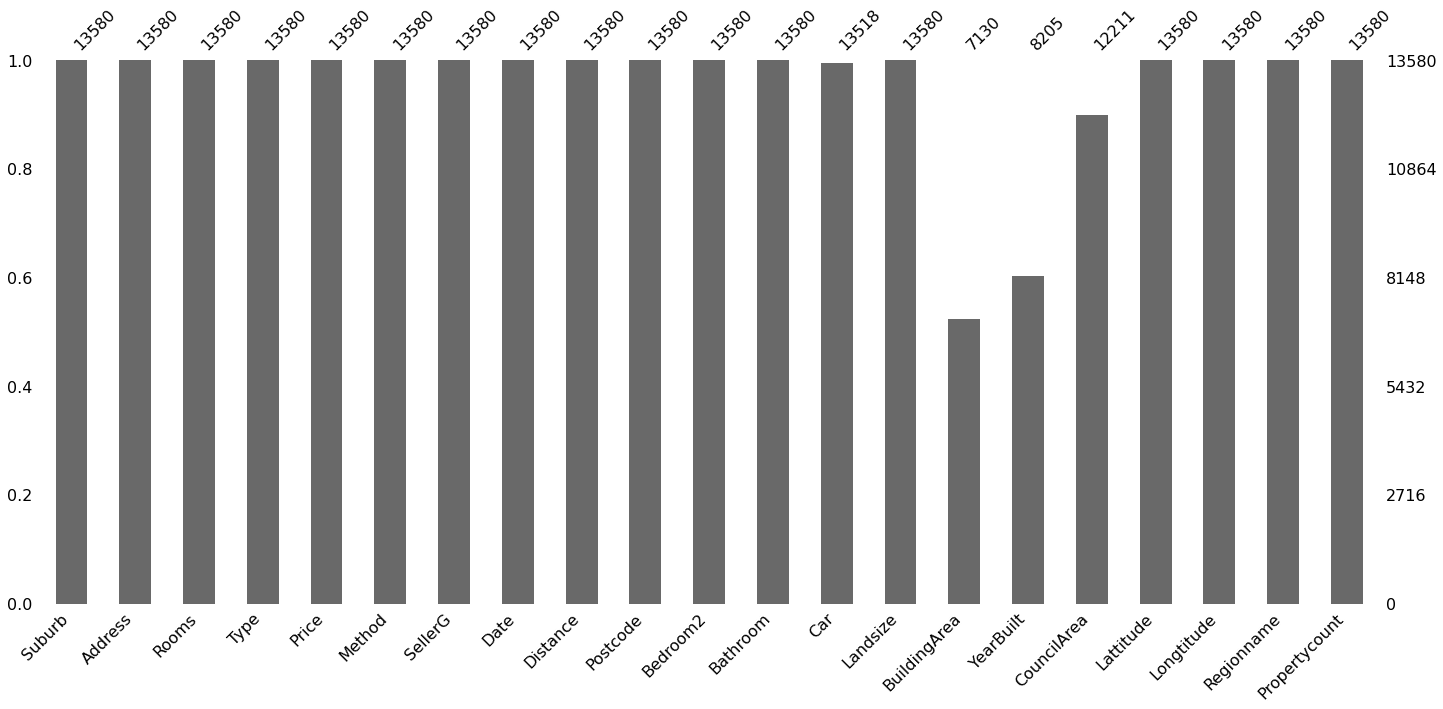

In [4]:
mns.bar(mel_b)

# Question 1: Perform a good cleaning and manipulation on the dataset

In [5]:
mel_b['BuildingArea'] = mel_b['BuildingArea'].fillna(np.mean(mel_b['BuildingArea']))
mel_b['YearBuilt'] = mel_b['YearBuilt'].fillna(np.mean(mel_b['YearBuilt']))
mel_b['Car'] = mel_b['YearBuilt'].fillna(np.mean(mel_b['Car']))
mel_b['CouncilArea'] = mel_b['CouncilArea'].fillna(mel_b['CouncilArea'].mode)

In [6]:
mel_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# Question 2: Plot a graph showing the distribution of prices across Melbourne

In [35]:
df = mel_b['Price']
fig = px.histogram(df, x = 'Price', title = 'DISTRIBUTION OF PRICES ACROSS MELBOURNE')
fig.show()

# Question 3:  Plot a graph showing the percentage of rooms

In [8]:
rooms_per = round(100*mel_b['Rooms'].value_counts()/len(mel_b['Rooms']),2)
rooms_per

3     43.31
2     26.86
4     19.79
1      5.01
5      4.39
6      0.49
7      0.07
8      0.06
10     0.01
Name: Rooms, dtype: float64

In [9]:
plt.figure(figsize = (30,20))
fig = px.bar(rooms_per, y = rooms_per, x = rooms_per.index, text = rooms_per.values,
             color = rooms_per.index, labels = {'y': 'INDEX', 'index': 'ROOMS'},
             title = "PERCENTAGE OF ROOMS", color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

<Figure size 2160x1440 with 0 Axes>

# Question 4: Plot a graph showing the Top 30 suburbs of Melbourne

In [10]:
top = mel_b.drop(['Address', 'Rooms', 'Type','Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
                 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 
                  'Propertycount'], axis = 1)

In [11]:
top

,Suburb,Price
0,Abbotsford,1480000.0
1,Abbotsford,1035000.0
2,Abbotsford,1465000.0
3,Abbotsford,850000.0
4,Abbotsford,1600000.0
...,...,...
13575,Wheelers Hill,1245000.0
13576,Williamstown,1031000.0
13577,Williamstown,1170000.0
13578,Williamstown,2500000.0


In [12]:
top_30 = top.nlargest(30,['Price'])

In [13]:
top_30

,Suburb,Price
12094,Mulgrave,9000000.0
7692,Canterbury,8000000.0
9575,Hawthorn,7650000.0
3616,Kew,6500000.0
12557,Middle Park,6400000.0
6372,Toorak,6250000.0
7554,Brighton,5800000.0
5631,South Yarra,5700000.0
9233,Middle Park,5600000.0
251,Armadale,5525000.0


In [14]:
fig = px.bar(top_30, y = 'Price', x = 'Suburb', text = 'Price', color = top_30.Suburb,
             labels = {'y' : 'PRICES OF SUBURBS', 'index':'SUBURBS'}, title = 'TOP THIRTY SUBURBS IN MELBOURNE',
             color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

# Question 5: Plot a graph showing the Distribution of real estate by districts based on the following feautures: 'Lattitude', 'Longtitude', 'Regionname','Propertycount'

<ipython-input-15-d67f13e6e5ef>:17: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



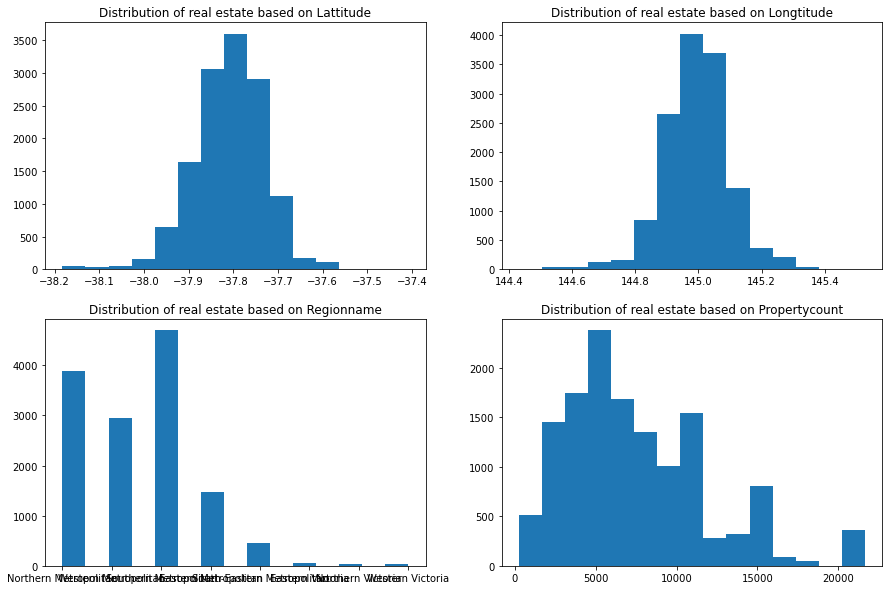

In [15]:
fig = plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.hist(mel_b['Lattitude'], bins = 15)
plt.title('Distribution of real estate based on Lattitude')

plt.subplot(2,2,2)
plt.hist(mel_b['Longtitude'], bins = 15)
plt.title('Distribution of real estate based on Longtitude')

plt.subplot(2,2,3)
plt.hist(mel_b['Regionname'], bins = 15)
plt.title('Distribution of real estate based on Regionname')

plt.subplot(2,2,4)
plt.hist(mel_b['Propertycount'], bins = 15)
plt.title('Distribution of real estate based on Propertycount')
fig.show()

# Question 6: Plot the Prices for real estate in areas of Melbourne by months and years for 2016 and 2017

In [16]:
mel_b['Date'] = pd.to_datetime(mel_b['Date'])
mel_b['Year']= pd.DatetimeIndex(mel_b['Date']).year
mel_b['Month']= pd.DatetimeIndex(mel_b['Date']).month_name()

In [17]:
mel_b['Year'].value_counts()

2017    7244
2016    6336
Name: Year, dtype: int64

<ipython-input-18-53160a4ad964>:4: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



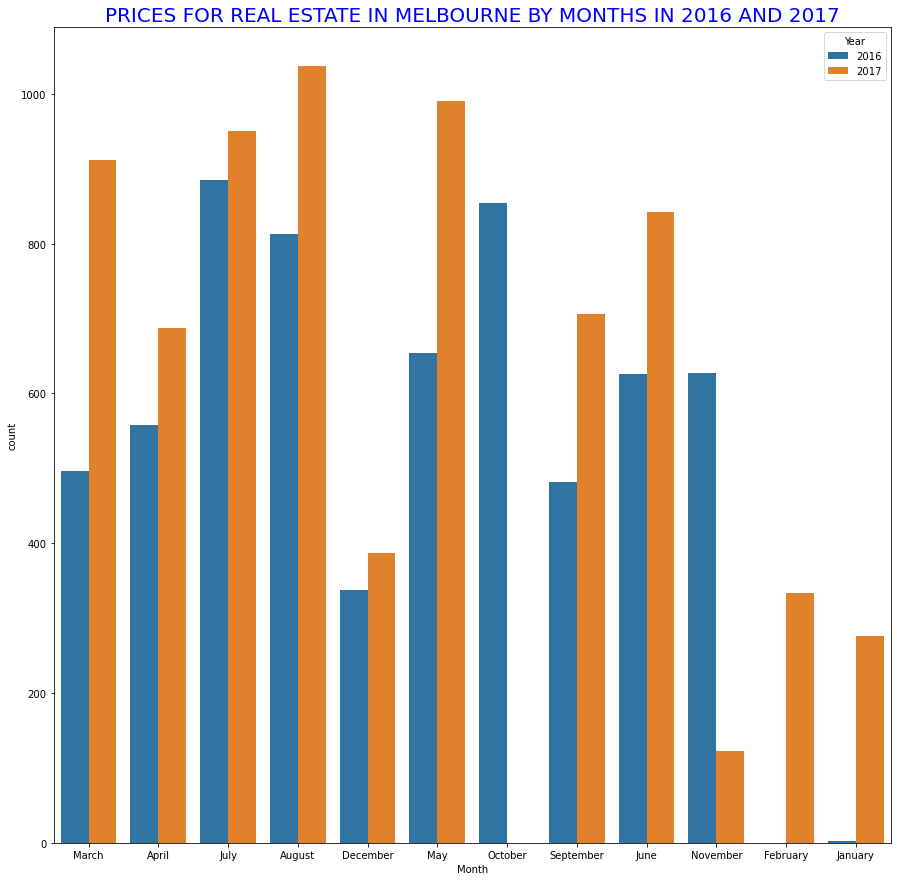

In [18]:
fig = plt.figure(figsize =(15,15))
sns.countplot(x = mel_b['Month'], hue = mel_b['Year']).set_title('PRICES FOR REAL ESTATE IN MELBOURNE BY MONTHS IN 2016 AND 2017',
                                                                color = 'b', fontsize = 20)
fig.show()

# Question 7: predict the dataset   to check how the independents variable affect the dependent variable and the prediction score should be from 0.78 upward

In [19]:
mel_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13580 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   13580 non-null  float64       
 15  YearBuilt      1358

In [20]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [21]:
mel_b['Suburb'] = pd.Series(lab_enc.fit_transform(mel_b['Suburb']))
mel_b['Address'] = pd.Series(lab_enc.fit_transform(mel_b['Address']))
mel_b['Type'] = pd.Series(lab_enc.fit_transform(mel_b['Type']))
mel_b['Method'] = pd.Series(lab_enc.fit_transform(mel_b['Method']))
mel_b['SellerG'] = pd.Series(lab_enc.fit_transform(mel_b['SellerG']))
mel_b['Regionname'] = pd.Series(lab_enc.fit_transform(mel_b['Regionname']))
mel_b['Month'] = pd.Series(lab_enc.fit_transform(mel_b['Month']))

In [22]:
mel_b.drop([ 'CouncilArea',], axis = 1, inplace = True)
mel_b.drop([ 'Date',], axis = 1, inplace = True)

In [23]:
mel_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  int32  
 1   Address        13580 non-null  int32  
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  int32  
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  int32  
 6   SellerG        13580 non-null  int32  
 7   Distance       13580 non-null  float64
 8   Postcode       13580 non-null  float64
 9   Bedroom2       13580 non-null  float64
 10  Bathroom       13580 non-null  float64
 11  Car            13580 non-null  float64
 12  Landsize       13580 non-null  float64
 13  BuildingArea   13580 non-null  float64
 14  YearBuilt      13580 non-null  float64
 15  Lattitude      13580 non-null  float64
 16  Longtitude     13580 non-null  float64
 17  Regionname     13580 non-null  int32  
 18  Proper

In [24]:
x = mel_b.drop('Type', axis = 1)
y = mel_b['Type']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
tree.score(x_test,y_test)

0.8460972017673049

In [28]:
pred = tree.predict(x_test)

In [29]:
pred

array([0, 2, 1, ..., 2, 0, 0])

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
print(confusion_matrix(y_test,pred))

[[2599  131  104]
 [ 117  125   78]
 [ 109   88  723]]


In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2834
           1       0.36      0.39      0.38       320
           2       0.80      0.79      0.79       920

    accuracy                           0.85      4074
   macro avg       0.69      0.70      0.70      4074
weighted avg       0.85      0.85      0.85      4074

